### Collection of tests and examples to become familiar with Sportradar API.

Links:
https://developer.sportradar.com/files/2017_Sportradar_MLB_Statistics_Summary.pdf
https://developer.sportradar.com/files/2017_Sportradar_MLB_Statistics_Feeds.pdf

In [7]:
# 90-day Free Trial (start-date = 9/9/2018)
filename = 'api_key'

# using function from "Keeping API Keys Secret.ipynb"
# by https://github.com/dylburger
def get_file_contents(filename):
    """ Given a filename,
        return the contents of that file
    """
    try:
        with open(filename, 'r') as f:
            # It's assumed our file contains a single line,
            # with our API key
            return f.read().strip()
    except FileNotFoundError:
        print("'%s' file not found" % filename)

my_api_key = get_file_contents(filename)

#### Import packages

* http.client - required for Sportradar API to make HTTP requests
* json - required to save and load JSON files extracted from Sportradar
* numpy & pandas - required for data wrangling and cleaning

In [107]:
import http.client
import time
import json
from pandas.io.json import json_normalize
import numpy as np
import pandas as pd

#### MLB API Map
https://developer.sportradar.com/

To best utilize the **MLB API**, several parameters are required to create the API calls. The map below illustrates how to obtain the parameters needed.

The **primary feeds** require only a `date` or `season` to call the endpoints. Those feeds provide `Game`, `Team`, or `Player Id's` which can be used to generate the `game`, `team`, and `player` feeds. All of the other feeds require no variables.

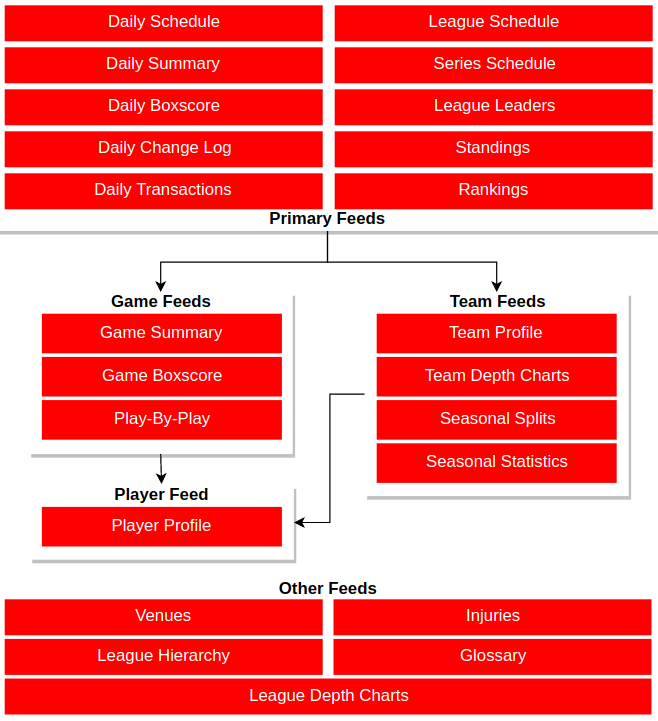
<center> image source: https://developer.sportradar.com/docs/read/baseball/MLB_v65 </center>

## Objective:  Gather Pitching Stats for MLB Starting Pitchers for 2016 - 2018 Seasons

* Get Team IDs using Primary Feed (League Schedules)
* Using Team IDs, get Player IDs for Pitchers

#### Collect 2017 MLB League Schedule and Save Results

In [26]:
# request string to access primary feed (league schedule) combined with api key
#request_2017_sched = "/mlb/trial/v6.5/en/games/2017/REG/schedule.json?api_key=" + my_api_key

# send request to sportradar server using the HTTP request url.
conn = http.client.HTTPSConnection("api.sportradar.us")
conn.request("GET", request_2017_sched)

# get response from server and store HTTPResponse instance
res = conn.getresponse()

# read response body and decode possible UTF-8 signature 
# at the beginning of some files
#json_2017_data = json.loads(res.read().decode("utf-8"))

In [27]:
# write results to json output file
with open('league_schedule_2017.json', 'w') as outfile:
    json.dump(json_2017_data, outfile)

#### Collect 2016 MLB League Schedule and Save Results

In [426]:
# request string to access primary feed (league schedule) combined with api key
#request_2016_sched = "/mlb/trial/v6.5/en/games/2016/REG/schedule.json?api_key=" + my_api_key

# send request to sportradar server using the HTTP request url.
conn = http.client.HTTPSConnection("api.sportradar.us")
conn.request("GET", request_2016_sched)

# get response from server and store HTTPResponse instance
res = conn.getresponse()

# read response body and decode possible UTF-8 signature 
# at the beginning of some files
#json_2016_data = json.loads(res.read().decode("utf-8"))

In [505]:
# write results to json output file
with open('league_schedule_2016.json', 'w') as outfile:
    json.dump(json_2016_data, outfile)

#### Open JSON files to collect Team IDs and Game IDs

In [190]:
# open json file and use list comprehension to extract list of entries
path = 'league_schedule_2016.json'
entries_2016 = [json.loads(line) for line in open(path)]

In [191]:
# create dataframe from set of entries
df_2016 = pd.DataFrame(entries_2016[0]['games'])

In [192]:
# show summary of dataframe
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431 entries, 0 to 2430
Data columns (total 15 columns):
attendance     2429 non-null float64
away           2431 non-null object
away_team      2431 non-null object
broadcast      2431 non-null object
coverage       2431 non-null object
day_night      2431 non-null object
duration       2429 non-null object
game_number    2431 non-null int64
home           2431 non-null object
home_team      2431 non-null object
id             2431 non-null object
rescheduled    26 non-null object
scheduled      2431 non-null object
status         2431 non-null object
venue          2431 non-null object
dtypes: float64(1), int64(1), object(13)
memory usage: 285.0+ KB


In [193]:
# open json file and use list comprehension to extract list of entries
path = 'league_schedule_2017.json'
entries_2017 = [json.loads(line) for line in open(path)]
entries_2017

[{'league': {'alias': 'MLB',
   'name': 'Major League Baseball',
   'id': '2fa448bc-fc17-4d3d-be03-e60e080fdc26'},
  'season': {'id': 'a0d35b04-59fb-465a-8dce-f2c0894e753c',
   'year': 2017,
   'type': 'REG'},
  'games': [{'id': '00404c04-9cbc-423f-ac20-0b6127998052',
    'status': 'closed',
    'coverage': 'full',
    'game_number': 1,
    'day_night': 'D',
    'scheduled': '2017-04-06T17:10:00+00:00',
    'home_team': 'aa34e0ed-f342-4ec6-b774-c79b47b60e2d',
    'away_team': '833a51a9-0d84-410f-bd77-da08c3e5e26e',
    'attendance': 16078,
    'duration': '3:14',
    'venue': {'name': 'Target Field',
     'market': 'Minnesota',
     'capacity': 39021,
     'surface': 'grass',
     'address': '353 N 5th Street',
     'city': 'Minneapolis',
     'state': 'MN',
     'zip': '55403',
     'country': 'USA',
     'id': '302f8dcd-eed6-4b83-8609-81548d51e955'},
    'home': {'name': 'Twins',
     'market': 'Minnesota',
     'abbr': 'MIN',
     'id': 'aa34e0ed-f342-4ec6-b774-c79b47b60e2d'},
    '

In [194]:
# create dataframe from set of entries
df_2017 = pd.DataFrame(entries_2017[0]['games'])

In [33]:
# show summary of dataframe
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431 entries, 0 to 2430
Data columns (total 15 columns):
attendance     2420 non-null float64
away           2431 non-null object
away_team      2431 non-null object
broadcast      2431 non-null object
coverage       2431 non-null object
day_night      2431 non-null object
duration       2431 non-null object
game_number    2431 non-null int64
home           2431 non-null object
home_team      2431 non-null object
id             2431 non-null object
rescheduled    39 non-null object
scheduled      2431 non-null object
status         2431 non-null object
venue          2431 non-null object
dtypes: float64(1), int64(1), object(13)
memory usage: 285.0+ KB


In [60]:
home_2016_ids = df_2016['home_team'].drop_duplicates().sort_values()
home_2016_ids

22     03556285-bdbb-4576-a06d-42f71f46ddc5
3      12079497-e414-450a-8bf2-29f91de646bf
5      1d678440-b4b1-4954-9b39-70afb3ebbcfa
9      2142e1ba-3b40-445c-b8bb-f1f8b1054220
7      25507be1-6a68-4267-bd82-e097d94b359b
34     27a59d3b-ff7c-48ea-b016-4798f560f5e1
2      29dd9a87-5bcc-4774-80c3-7f50d985068b
66     43a39081-52b4-4f93-ad29-da7f329ea960
33     44671792-dc02-4fdd-a5ad-f5f17edaa9d7
11     47f490cd-2f58-4ef7-9dfd-2ad6ba6c1ae8
64     481dfe7e-5dab-46ab-a49f-9dcc2b6e2cfd
13     4f735188-37c8-473d-ae32-1f7e34ccf892
1      55714da8-fcaf-4574-8443-59bfb511a524
35     575c19b7-4052-41c2-9f0a-1c5813d02f99
73     75729d34-bca7-4a0f-b3df-6f26c6ad3719
79     80715d0d-0d2a-450f-a970-1b9a3b18c7e7
24     833a51a9-0d84-410f-bd77-da08c3e5e26e
65     93941372-eb4c-4c40-aced-fe3267174393
69     a09ec676-f887-43dc-bbb3-cf4bbaee9a18
124    a7723160-10b7-4277-a309-d8dd95a8ae65
4      aa34e0ed-f342-4ec6-b774-c79b47b60e2d
20     bdc11650-6f74-49c4-875e-778aeb7632d9
0      c874a065-c115-4e7d-b0f0-2

In [229]:
dodgers_games = df_2016[(df_2016['away_team']=='ef64da7f-cfaf-4300-87b0-9313386b977c')]
dodgers_games.sort_values('scheduled')

attendance                                               away  \
1989     44317.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
2108     28329.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
1911     30054.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
705      41940.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
2344     41742.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
887      41224.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
147      41656.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
786      14160.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
2195     16087.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
1471     18431.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
984      37153.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
2397     42179.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
167      35962.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
43       14116.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
1939     13226.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
125      42304.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
1577     47156.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
1091     46665.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
2412     44006.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
1118     45007.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
350      31836.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
1516     40221.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
2138     43100.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
577      43462.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
1549     42227.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
2143     42287.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
1513     41470.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
2098     34681.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
2316     36426.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
955      37422.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
...          ...                                                ...   
1097     41423.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
1350     32607.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
747      28682.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
2007     31117.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
212      28118.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
797      21137.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
738      29187.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
2055     28184.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
1247     29735.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
296      28752.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
2200     15690.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
29       24308.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
118      24790.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
1867     22683.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
1981     22940.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
1916     20933.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
740      20188.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
1482     32058.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
901      32615.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
1218     30254.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
495      27126.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
1784     28211.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
894      38255.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
943      26159.0  {'name': 'Dodgers', 'market': 'Los Angeles', '...   
197      27376.0  {'name': 'Do

In [230]:
pd.DataFrame(dodgers_games['scheduled'])

scheduled
29    2016-08-30T00:40:00+00:00
43    2016-05-03T23:10:00+00:00
64    2016-06-27T16:35:00+00:00
118   2016-08-31T19:10:00+00:00
125   2016-05-06T23:07:00+00:00
147   2016-04-10T20:05:00+00:00
167   2016-04-24T20:10:00+00:00
197   2016-09-28T02:10:00+00:00
212   2016-08-16T23:05:00+00:00
261   2016-06-13T00:30:00+00:00
284   2016-07-17T00:10:00+00:00
288   2016-06-15T19:40:00+00:00
296   2016-08-21T17:10:00+00:00
339   2016-09-29T02:10:00+00:00
350   2016-05-21T02:40:00+00:00
397   2016-10-01T02:15:00+00:00
471   2016-06-30T00:10:00+00:00
477   2016-09-30T01:10:00+00:00
495   2016-09-16T01:40:00+00:00
497   2016-06-11T23:15:00+00:00
511   2016-06-11T02:15:00+00:00
577   2016-05-27T23:10:00+00:00
688   2016-10-01T20:05:00+00:00
705   2016-04-07T20:35:00+00:00
738   2016-08-18T23:05:00+00:00
740   2016-09-11T17:10:00+00:00
747   2016-08-04T00:40:00+00:00
786   2016-04-19T23:10:00+00:00
797   2016-08-17T23:05:00+00:00
818   2016-07-20T23:05:00+00:00
...                         ...
1471  2016-04-21T16:10:00+00:00
1482  2016-09-12T23:05:00+00:00
1513  2016-05-30T21:05:00+00:00
1516  2016-05-22T02:10:00+00:00
1549  2016-05-28T23:15:00+00:00
1577  2016-05-07T17:07:00+00:00
1587  2016-07-17T20:10:00+00:00
1598  2016-07-23T00:15:00+00:00
1630  2016-07-16T01:40:00+00:00
1784  2016-09-17T01:40:00+00:00
1867  2016-09-01T00:10:00+00:00
1911  2016-04-07T01:10:00+00:00
1916  2016-09-10T23:10:00+00:00
1939  2016-05-04T23:10:00+00:00
1959  2016-06-14T01:40:00+00:00
1981  2016-09-09T23:10:00+00:00
1989  2016-04-04T23:05:00+00:00
2007  2016-08-05T00:40:00+00:00
2055  2016-08-19T23:10:00+00:00
2098  2016-06-01T00:05:00+00:00
2108  2016-04-06T02:10:00+00:00
2138  2016-05-22T20:40:00+00:00
2143  2016-05-30T00:00:00+00:00
2195  2016-04-20T23:10:00+00:00
2200  2016-08-22T16:35:00+00:00
2316  2016-06-02T00:05:00+00:00
2344  2016-04-09T02:15:00+00:00
2397  2016-04-24T00:10:00+00:00
2412  2016-05-19T02:05:00+00:00
2417  2016-10-02T19:05:00+00:00

[81 rows x 1 columns]

In [222]:
seven_hours_earlier = pd.to_timedelta(dodgers_games['scheduled']) - pd.Timedelta('7 hours')

ValueError: only leading negative signs are allowed

In [214]:
seven_hours_earlier

datetime.datetime(2018, 9, 11, 7, 29, 24, 596063)

In [61]:
home_2017_ids = df_2017['home_team'].drop_duplicates().sort_values()
home_2017_ids

7       03556285-bdbb-4576-a06d-42f71f46ddc5
6       12079497-e414-450a-8bf2-29f91de646bf
17      1d678440-b4b1-4954-9b39-70afb3ebbcfa
27      2142e1ba-3b40-445c-b8bb-f1f8b1054220
15      25507be1-6a68-4267-bd82-e097d94b359b
14      27a59d3b-ff7c-48ea-b016-4798f560f5e1
3       29dd9a87-5bcc-4774-80c3-7f50d985068b
1947    3bbb3b39-b5cb-4fc9-bd22-522521f0f329
22      43a39081-52b4-4f93-ad29-da7f329ea960
40      44671792-dc02-4fdd-a5ad-f5f17edaa9d7
42      47f490cd-2f58-4ef7-9dfd-2ad6ba6c1ae8
102     481dfe7e-5dab-46ab-a49f-9dcc2b6e2cfd
10      4f735188-37c8-473d-ae32-1f7e34ccf892
1       55714da8-fcaf-4574-8443-59bfb511a524
9       575c19b7-4052-41c2-9f0a-1c5813d02f99
13      75729d34-bca7-4a0f-b3df-6f26c6ad3719
2       80715d0d-0d2a-450f-a970-1b9a3b18c7e7
76      833a51a9-0d84-410f-bd77-da08c3e5e26e
5       93941372-eb4c-4c40-aced-fe3267174393
66      a09ec676-f887-43dc-bbb3-cf4bbaee9a18
18      a7723160-10b7-4277-a309-d8dd95a8ae65
0       aa34e0ed-f342-4ec6-b774-c79b47b60e2d
23      bd

In [545]:
#def create_request_string(id_list, api_key):
#    """accepts list of team ids and sportradar api key, sends HTTP requests, 
#       collects team profiles and writes results to json file"""
#    for id in id_list:
#        conn = http.client.HTTPSConnection("api.sportradar.us")
#        request_str = "/mlb/trial/v6.5/en/teams/" + id + "/profile.json?api_key=" + api_key
#        conn.request("GET", request_str)
#        res = conn.getresponse()
#        data = res.read()
#        
#        json_result = json.loads(data.decode("utf-8"))
#        fname = json_result['name']
#        fname = fname.replace(" ", "_")
#         
#        out_str = fname + "_profile.json"
#        # write results to json output file
#        with open(out_str, 'w') as outfile:
#            json.dump(json_result, outfile)
#            
#        conn.close()
#        time.sleep(2)
#        
#        print(request_str)
#        print(out_str)
#
#create_request_string(home_2017_ids, api_key)

In [63]:
# open json file and use list comprehension to extract list of entries
path = 'Dodgers_profile.json'
profile = [json.loads(line) for line in open(path)]

In [78]:
#pitchers = [plyr['first_name'] for plyr in profile[0]['players'] if plyr['primary_position']='P']
df_players = pd.DataFrame(profile[0]['players'])

df_starting_pithers = df_players[(df_players['primary_position']=='SP') & (df_players['status']=='A')]

In [82]:
df_starting_pithers[['first_name', 'last_name', 'id']]

first_name last_name                                    id
23     Walker   Buehler  3703319e-ec2e-4db7-9e86-59589e233f95
31    Richard      Hill  d9936d13-479d-43e0-a845-c74e17046622
34    Clayton   Kershaw  d3351c6e-12cf-4ab5-b651-ad23d49c4245
39   Hyun-Jin       Ryu  01d71849-6f8e-4394-ae98-155bd61c68e8
45     Robert      Wood  956280da-4ce3-41db-8830-e04ef52bb0f2

In [83]:
request_plyr_proile = "/mlb/trial/v6.5/en/players/d3351c6e-12cf-4ab5-b651-ad23d49c4245/profile.json?api_key=" + my_api_key

conn = http.client.HTTPSConnection("api.sportradar.us")

conn.request("GET", request_plyr_proile)

res = conn.getresponse()

json_player_data = json.loads(res.read().decode("utf-8"))

In [84]:
# write results to json output file
with open('Kershaw_Clayton_profile.json', 'w') as outfile:
    json.dump(json_player_data, outfile)

In [126]:
# open json file and use list comprehension to extract list of entries
path = 'Kershaw_Clayton_profile.json'
pitcher_profile = [json.loads(line) for line in open(path)]
df_pprofile = pd.DataFrame(pitcher_profile[0])

In [165]:
df_plyr_seasons = pd.DataFrame(df_pprofile['player']['seasons'])
df_plyr_totals = df_plyr_seasons[(df_plyr_seasons['type']=='REG') & (df_plyr_seasons['year']==2017)]

In [189]:
df_plyr_totals['totals'].apply(pd.Series)['statistics'].apply(pd.Series)['pitching'].apply(pd.Series)['starters'].apply(pd.Series)['games'].apply(pd.Series)

start  play  finish  svo  qstart  shutout  complete  win  loss  save  hold  \
2     27    27       0    0      20        0         1   18     4     0     0   

   blown_save  team_win  team_loss  
2           0        23          4

In [138]:
conn = http.client.HTTPSConnection("api.sportradar.us")
conn.request("GET", "/mlb/trial/v6.5/en/games/03d080ba-c18d-4587-9f9c-79a39ee9c00e/boxscore.json?api_key=5jm59pm84khcx588a5v2st8b")

res = conn.getresponse()
boxscores = res.read()

print(boxscores.decode("utf-8"))

{"game":{"id":"03d080ba-c18d-4587-9f9c-79a39ee9c00e","status":"closed","coverage":"full","game_number":1,"day_night":"N","scheduled":"2017-10-17T00:08:00+00:00","home_team":"a09ec676-f887-43dc-bbb3-cf4bbaee9a18","away_team":"eb21dadd-8f10-4095-8bf3-dfb3b779f107","ps_round":"ALCS","ps_game":"3","attendance":49373,"duration":"3:25","venue":{"name":"Yankee Stadium","market":"New York","capacity":49642,"surface":"grass","address":"One East 161st Street","city":"Bronx","state":"NY","zip":"10451","country":"USA","id":"706e9828-6687-4ac8-a409-3fb972e8bae9"},"broadcast":{"network":"FOX / FS1"},"final":{"inning":9,"inning_half":"T"},"home":{"name":"Yankees","market":"New York","abbr":"NYY","id":"a09ec676-f887-43dc-bbb3-cf4bbaee9a18","runs":8,"hits":7,"errors":1,"win":4,"loss":4,"probable_pitcher":{"preferred_name":"CC","first_name":"Carsten","last_name":"Sabathia","jersey_number":"52","id":"34c78a46-c798-4545-a05c-f9b693635e9b","win":0,"loss":0,"era":3.724},"starting_pitcher":{"preferred_name":

In [331]:
json2_data = json.loads(boxscores)
data1 = json_normalize(json2_data)
ea_data = [i for i in data1]
ea_data

['_comment',
 'game.attendance',
 'game.away.abbr',
 'game.away.errors',
 'game.away.events',
 'game.away.hits',
 'game.away.id',
 'game.away.loss',
 'game.away.market',
 'game.away.name',
 'game.away.probable_pitcher.era',
 'game.away.probable_pitcher.first_name',
 'game.away.probable_pitcher.id',
 'game.away.probable_pitcher.jersey_number',
 'game.away.probable_pitcher.last_name',
 'game.away.probable_pitcher.loss',
 'game.away.probable_pitcher.preferred_name',
 'game.away.probable_pitcher.win',
 'game.away.runs',
 'game.away.scoring',
 'game.away.starting_pitcher.era',
 'game.away.starting_pitcher.first_name',
 'game.away.starting_pitcher.id',
 'game.away.starting_pitcher.jersey_number',
 'game.away.starting_pitcher.last_name',
 'game.away.starting_pitcher.loss',
 'game.away.starting_pitcher.preferred_name',
 'game.away.starting_pitcher.win',
 'game.away.win',
 'game.away_team',
 'game.broadcast.network',
 'game.coverage',
 'game.day_night',
 'game.duration',
 'game.final.inning',
 

In [140]:
data1[['game.away.starting_pitcher.first_name', 'game.away.starting_pitcher.id','game.away.starting_pitcher.jersey_number', 'game.away.starting_pitcher.last_name', 'game.home.starting_pitcher.first_name', 'game.home.starting_pitcher.id','game.home.starting_pitcher.jersey_number', 'game.home.starting_pitcher.last_name']]

game.away.starting_pitcher.first_name         game.away.starting_pitcher.id  \
0                               Charles  ff772241-8fdd-488c-a81e-49b44ce600fc   

  game.away.starting_pitcher.jersey_number  \
0                                       50   

  game.away.starting_pitcher.last_name game.home.starting_pitcher.first_name  \
0                               Morton                               Carsten   

          game.home.starting_pitcher.id  \
0  34c78a46-c798-4545-a05c-f9b693635e9b   

  game.home.starting_pitcher.jersey_number  \
0                                       52   

  game.home.starting_pitcher.last_name  
0                             Sabathia

In [158]:
conn = http.client.HTTPSConnection("api.sportradar.us")

conn.request("GET", "/mlb/trial/v6.5/en/games/03d080ba-c18d-4587-9f9c-79a39ee9c00e/pbp.json?api_key=5jm59pm84khcx588a5v2st8b")

res = conn.getresponse()
pbp = res.read()

#print(pbp.decode("utf-8"))

In [242]:
json3_data = json.loads(pbp)
data3 = json_normalize(json3_data)
innings = json3_data['game']['innings']
inning_data = pd.DataFrame(innings)
halfs = [h for h in inning_data['halfs']]
halfs_data = pd.DataFrame(halfs)
halfs_data

0  \
0  {'half': 'T', 'events': [{'lineup': {'player_i...   
1  {'half': 'T', 'events': [{'at_bat': {'hitter_i...   
2  {'half': 'T', 'events': [{'at_bat': {'hitter_i...   
3  {'half': 'T', 'events': [{'at_bat': {'hitter_i...   
4  {'half': 'T', 'events': [{'at_bat': {'hitter_i...   
5  {'half': 'T', 'events': [{'at_bat': {'hitter_i...   
6  {'half': 'T', 'events': [{'at_bat': {'hitter_i...   
7  {'half': 'T', 'events': [{'lineup': {'player_i...   
8  {'half': 'T', 'events': [{'at_bat': {'hitter_i...   
9  {'half': 'T', 'events': [{'lineup': {'player_i...   

                                                   1  
0  {'half': 'B', 'events': [{'lineup': {'player_i...  
1  {'half': 'B', 'events': [{'at_bat': {'hitter_i...  
2  {'half': 'B', 'events': [{'at_bat': {'hitter_i...  
3  {'half': 'B', 'events': [{'at_bat': {'hitter_i...  
4  {'half': 'B', 'events': [{'at_bat': {'hitter_i...  
5  {'half': 'B', 'events': [{'lineup': {'player_i...  
6  {'half': 'B', 'events': [{'at_bat': {'hitter_i...  
7  {'half': 'B', 'events': [{'at_bat': {'hitter_i...  
8  {'half': 'B', 'events': [{'at_bat': {'hitter_i...  
9                        {'half': 'B', 'events': []}